# Imports

In [1]:
from pathlib import Path
from src.data.paths import project_dir
from src.data.analysis import Circle, get_mean_std, get_timestamp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from typing import List
def read_df(path : Path , det_names : List[str]) -> pd.DataFrame:
    df = pd.DataFrame()
    df["det_id"] = det_names
    df.det_id = df.det_id.astype('uint8')
    df["raw_data"] = df.det_id.apply(lambda id: np.load(path / f"{id}" / "raw.npy"))
    df["timestamp"] = df.det_id.apply(lambda id: get_timestamp(path / f"{id}" / "metadata.txt"))
    df["det_circle"] = df.det_id.apply(lambda x: Circle.from_json(path / f"{x}lv" / "det-circle.json"))
    df["raw_mean_center"] = df.apply(lambda tmpdf: get_mean_std(tmpdf.raw_data, tmpdf.det_circle)[0], axis=1)
    df["raw_std_center"] = df.apply(lambda tmpdf: get_mean_std(tmpdf.raw_data, tmpdf.det_circle)[1], axis=1)
    return df

# Data reading

In [3]:
pre_irr_bg = project_dir / "data" / "interim" / "foils" / "2022_11_23_background"
pre_irr_bg_ids = sorted((entry.name for entry in pre_irr_bg.iterdir() if entry.name.isdigit()), key=lambda s: int(s))
pre_irr_bg, pre_irr_bg_ids;

In [4]:
data_co60 = project_dir / "data" / "interim" / "foils" / "2022_11_23_Co60"
data_co60_ids = sorted((entry.name for entry in data_co60.iterdir() if entry.name.isdigit()), key=lambda s: int(s))
data_co60, data_co60_ids;

In [5]:
post_irr_bg = project_dir / "data" / "interim" / "foils" / "2022_11_24_background"
post_irr_bg_ids = sorted((entry.name for entry in post_irr_bg.iterdir() if entry.name.isdigit()), key=lambda s: int(s))
post_irr_bg, post_irr_bg_ids;

In [6]:
df_pre_bg = read_df(pre_irr_bg, pre_irr_bg_ids)
df_pre_bg["label"] = "pre_irr_bg"
df_pre_bg.head()

,det_id,raw_data,timestamp,det_circle,raw_mean_center,raw_std_center,label
0,1,"[[1020.0, 1062.0, 1058.0, 1071.0, 1066.0, 1073...",2022-11-23 11:08:33+01:00,"Circle(x=512.5, y=487.5, r=485.3999938964844)",1038.505005,12.582836,pre_irr_bg
1,2,"[[1026.0, 1061.0, 1061.0, 1073.0, 1061.0, 1065...",2022-11-23 11:10:45+01:00,"Circle(x=486.5, y=478.5, r=487.1000061035156)",1039.671265,12.507147,pre_irr_bg
2,3,"[[1024.0, 1067.0, 1067.0, 1067.0, 1057.0, 1069...",2022-11-23 11:12:14+01:00,"Circle(x=487.5, y=466.5, r=489.0)",1040.051636,12.474659,pre_irr_bg
3,4,"[[1025.0, 1065.0, 1062.0, 1064.0, 1068.0, 1074...",2022-11-23 11:13:33+01:00,"Circle(x=487.5, y=496.5, r=488.0)",1040.449829,12.496416,pre_irr_bg
4,5,"[[1017.0, 1057.0, 1065.0, 1068.0, 1073.0, 1068...",2022-11-23 11:14:53+01:00,"Circle(x=497.5, y=457.5, r=489.79998779296875)",1040.264282,12.218828,pre_irr_bg


In [7]:
df_Co60 = read_df(data_co60, data_co60_ids)
df_Co60["label"] = "Co60"
df_Co60.head()

,det_id,raw_data,timestamp,det_circle,raw_mean_center,raw_std_center,label
0,1,"[[1037.0, 1071.0, 1071.0, 1080.0, 1078.0, 1069...",2022-11-23 16:34:28+01:00,"Circle(x=497.5, y=481.5, r=484.0)",1214.841187,42.278210,Co60
1,2,"[[1032.0, 1073.0, 1084.0, 1082.0, 1082.0, 1077...",2022-11-23 16:33:01+01:00,"Circle(x=477.5, y=481.5, r=484.8999938964844)",1223.067017,41.457825,Co60
2,3,"[[1023.0, 1079.0, 1071.0, 1065.0, 1082.0, 1071...",2022-11-23 16:31:33+01:00,"Circle(x=484.5, y=489.5, r=484.6000061035156)",1220.954590,41.784103,Co60
3,4,"[[1029.0, 1067.0, 1066.0, 1069.0, 1072.0, 1071...",2022-11-23 16:30:18+01:00,"Circle(x=489.5, y=501.5, r=488.70001220703125)",1209.537476,40.260750,Co60
4,5,"[[1020.0, 1070.0, 1064.0, 1073.0, 1079.0, 1080...",2022-11-23 16:29:01+01:00,"Circle(x=486.5, y=508.5, r=485.3999938964844)",1229.223877,44.386940,Co60


In [8]:
df_post_bg = read_df(post_irr_bg, post_irr_bg_ids)
df_post_bg["label"] = "post_irr_bg"
df_post_bg.head()

,det_id,raw_data,timestamp,det_circle,raw_mean_center,raw_std_center,label
0,1,"[[1020.0, 1068.0, 1065.0, 1068.0, 1071.0, 1074...",2022-11-24 11:48:12+01:00,"Circle(x=515.5, y=495.5, r=486.79998779296875)",1038.927246,11.643701,post_irr_bg
1,2,"[[1024.0, 1062.0, 1069.0, 1068.0, 1064.0, 1070...",2022-11-24 11:50:16+01:00,"Circle(x=494.5, y=473.5, r=486.20001220703125)",1039.829468,12.458657,post_irr_bg
2,3,"[[1026.0, 1067.0, 1064.0, 1069.0, 1072.0, 1062...",2022-11-24 11:51:32+01:00,"Circle(x=494.5, y=487.5, r=485.3999938964844)",1040.009399,12.294284,post_irr_bg
3,4,"[[1020.0, 1072.0, 1065.0, 1070.0, 1068.0, 1074...",2022-11-24 11:52:49+01:00,"Circle(x=490.5, y=497.5, r=489.5)",1040.453247,12.480117,post_irr_bg
4,5,"[[1026.0, 1061.0, 1062.0, 1074.0, 1068.0, 1065...",2022-11-24 11:54:06+01:00,"Circle(x=485.5, y=488.5, r=486.1000061035156)",1040.648560,12.576518,post_irr_bg


In [9]:
df = pd.concat([df_pre_bg, df_Co60, df_post_bg], ignore_index=True)
df.head()

,det_id,raw_data,timestamp,det_circle,raw_mean_center,raw_std_center,label
0,1,"[[1020.0, 1062.0, 1058.0, 1071.0, 1066.0, 1073...",2022-11-23 11:08:33+01:00,"Circle(x=512.5, y=487.5, r=485.3999938964844)",1038.505005,12.582836,pre_irr_bg
1,2,"[[1026.0, 1061.0, 1061.0, 1073.0, 1061.0, 1065...",2022-11-23 11:10:45+01:00,"Circle(x=486.5, y=478.5, r=487.1000061035156)",1039.671265,12.507147,pre_irr_bg
2,3,"[[1024.0, 1067.0, 1067.0, 1067.0, 1057.0, 1069...",2022-11-23 11:12:14+01:00,"Circle(x=487.5, y=466.5, r=489.0)",1040.051636,12.474659,pre_irr_bg
3,4,"[[1025.0, 1065.0, 1062.0, 1064.0, 1068.0, 1074...",2022-11-23 11:13:33+01:00,"Circle(x=487.5, y=496.5, r=488.0)",1040.449829,12.496416,pre_irr_bg
4,5,"[[1017.0, 1057.0, 1065.0, 1068.0, 1073.0, 1068...",2022-11-23 11:14:53+01:00,"Circle(x=497.5, y=457.5, r=489.79998779296875)",1040.264282,12.218828,pre_irr_bg


# Data inspection

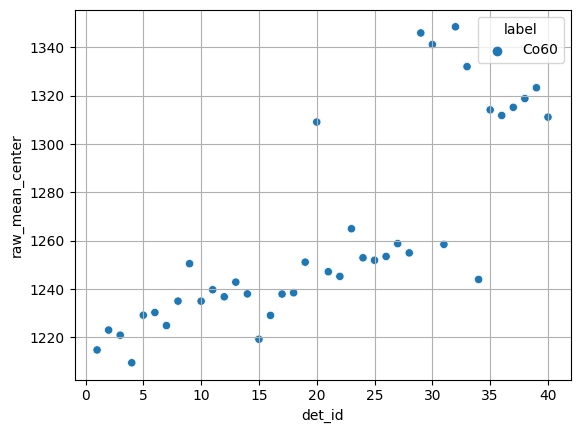

In [10]:
g = sns.scatterplot(data=df[df.label=="Co60"], x="det_id", y="raw_mean_center", hue="label")
g.grid()

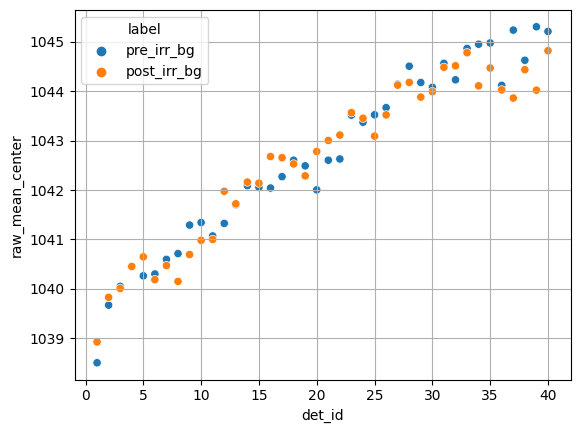

In [11]:
g = sns.scatterplot(data=df[df.label!="Co60"], x="det_id", y="raw_mean_center", hue="label")
g.grid()

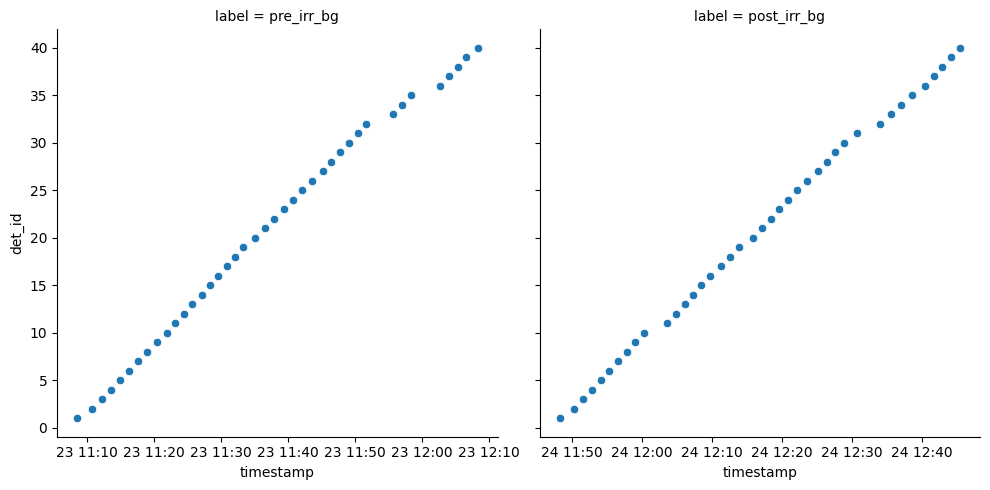

In [12]:
g = sns.relplot(data=df[df.label!="Co60"], x="timestamp", y="det_id", col="label", facet_kws={'sharey': True, 'sharex': False})

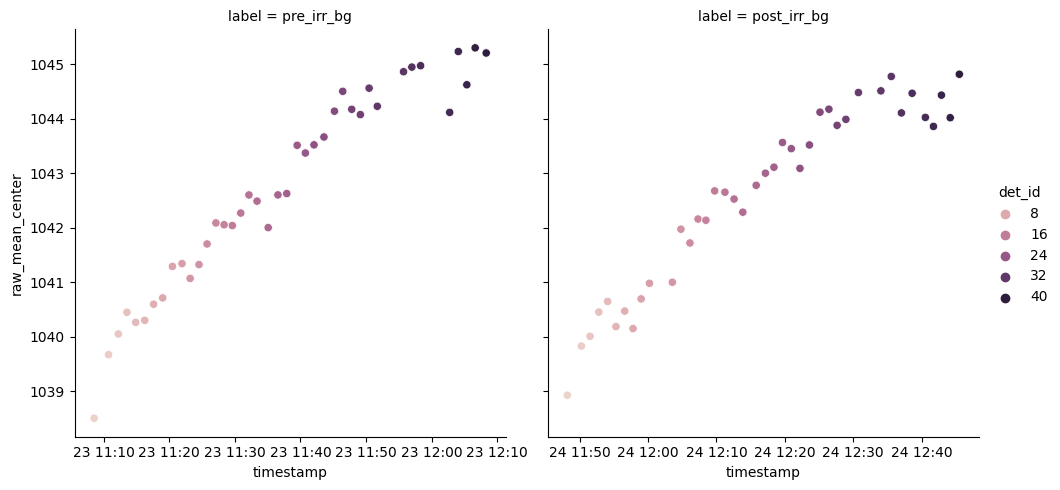

In [13]:
g = sns.relplot(data=df[df.label!="Co60"], x="timestamp", y="raw_mean_center", hue="det_id", col="label", facet_kws={'sharey': True, 'sharex': False})

In [30]:
# convert timestamp to number of seconds since start
df[df.label=="pre_irr_bg"].timestamp.apply(lambda x: (x - df[df.label=="pre_irr_bg"].timestamp.min()).total_seconds()).values

array([   0.,  132.,  221.,  300.,  380.,  463.,  544.,  627.,  716.,
        804.,  878.,  959., 1033., 1114., 1189., 1264., 1341., 1416.,
       1490., 1592., 1681., 1762., 1857., 1932., 2011., 2102., 2198.,
       2274., 2356., 2435., 2515., 2590., 2830., 2906., 2986., 3252.,
       3331., 3409., 3485., 3586.])

In [33]:
x = df[df.label=="pre_irr_bg"].timestamp.apply(lambda x: (x - df[df.label=="pre_irr_bg"].timestamp.min()).total_seconds()).values
y = df[df.label=="pre_irr_bg"].raw_mean_center.values
a,b = np.polyfit(x, y, 1)
a,b

(0.001687053830354033, 1039.8119645231088)

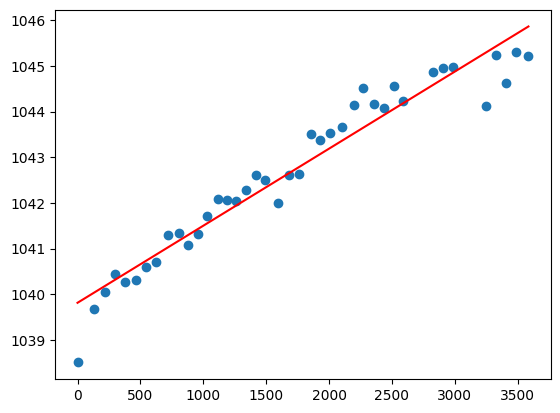

In [35]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', label='original data')
ax.plot(x, a*x + b, 'r', label='fitted line')

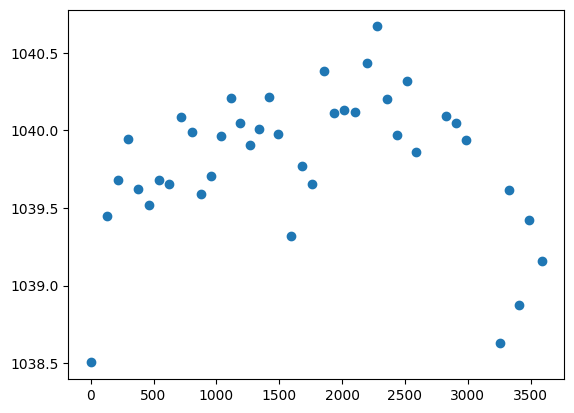

In [36]:
fig, ax = plt.subplots()
ax.plot(x, y - a*x, 'o', label='original data')
#ax.plot(x, a*x + b, 'r', label='fitted line')

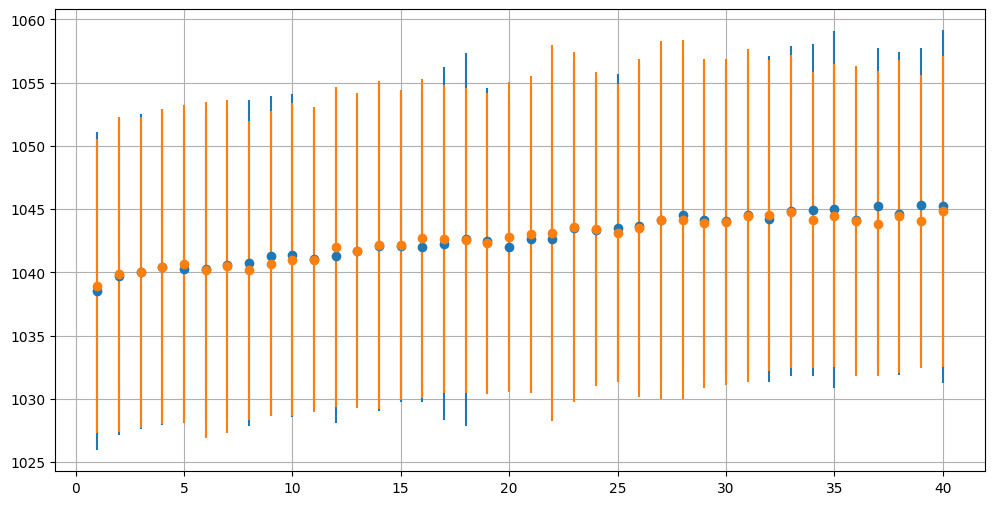

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for label in df.label.unique():
    if label != "Co60":
        df_tmp = df[df.label==label]
        ax.errorbar(df_tmp.det_id, df_tmp.raw_mean_center, yerr=df_tmp.raw_std_center, fmt="o", label=label)
ax.grid();

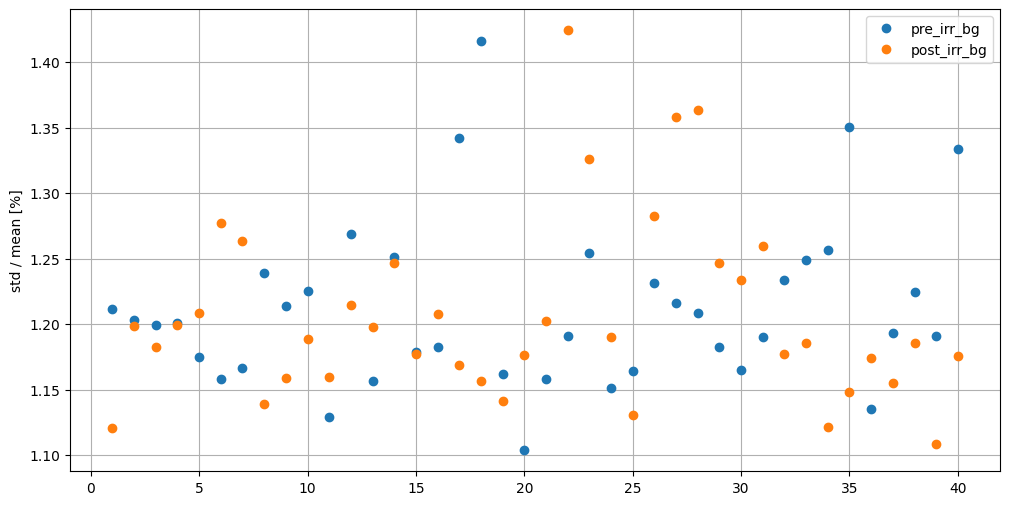

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
for label in df.label.unique():
    if label != "Co60":
        df_tmp = df[df.label==label]
        ax.plot(df_tmp.det_id, 100 * (df_tmp.raw_std_center / df_tmp.raw_mean_center) , label=label, marker="o", linestyle="None")
ax.set_ylabel("std / mean [%]")
ax.legend()
ax.grid();

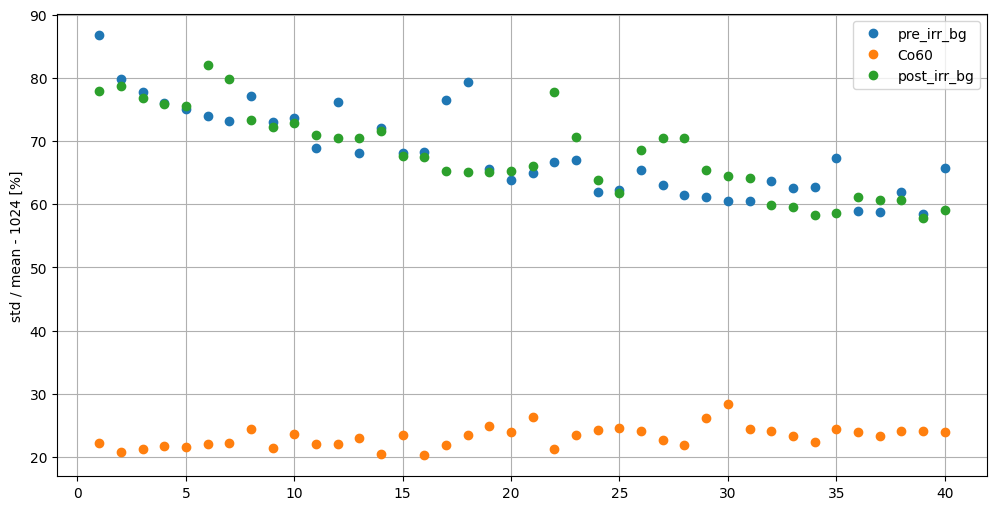

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
const_bg = 1024
for label in df.label.unique():
    df_tmp = df[df.label==label]
    ax.plot(df_tmp.det_id, 100 * (df_tmp.raw_std_center / (df_tmp.raw_mean_center-const_bg)) , label=label, marker="o", linestyle="None")
ax.set_ylabel(f"std / mean - {const_bg} [%]")
ax.legend()
ax.grid();

# Adding analysis circle

In [17]:
df['analysis_circle'] = df.det_circle.apply(lambda c: Circle(c.x, c.y, 300))
df["raw_mean"] = df.apply(lambda tmpdf: get_mean_std(tmpdf.raw_data, tmpdf.analysis_circle)[0], axis=1)
df["raw_std"] = df.apply(lambda tmpdf: get_mean_std(tmpdf.raw_data, tmpdf.analysis_circle)[1], axis=1)
df.head()

,det_id,raw_data,timestamp,det_circle,raw_mean_center,raw_std_center,label,analysis_circle,raw_mean,raw_std
0,1,"[[1020.0, 1062.0, 1058.0, 1071.0, 1066.0, 1073...",2022-11-23 11:08:33+01:00,"Circle(x=512.5, y=487.5, r=485.3999938964844)",1038.505005,12.582836,pre_irr_bg,"Circle(x=512.5, y=487.5, r=300)",1036.587402,13.411469
1,2,"[[1026.0, 1061.0, 1061.0, 1073.0, 1061.0, 1065...",2022-11-23 11:10:45+01:00,"Circle(x=486.5, y=478.5, r=487.1000061035156)",1039.671265,12.507147,pre_irr_bg,"Circle(x=486.5, y=478.5, r=300)",1037.347534,11.007259
2,3,"[[1024.0, 1067.0, 1067.0, 1067.0, 1057.0, 1069...",2022-11-23 11:12:14+01:00,"Circle(x=487.5, y=466.5, r=489.0)",1040.051636,12.474659,pre_irr_bg,"Circle(x=487.5, y=466.5, r=300)",1037.697388,10.914078
3,4,"[[1025.0, 1065.0, 1062.0, 1064.0, 1068.0, 1074...",2022-11-23 11:13:33+01:00,"Circle(x=487.5, y=496.5, r=488.0)",1040.449829,12.496416,pre_irr_bg,"Circle(x=487.5, y=496.5, r=300)",1038.122925,10.947999
4,5,"[[1017.0, 1057.0, 1065.0, 1068.0, 1073.0, 1068...",2022-11-23 11:14:53+01:00,"Circle(x=497.5, y=457.5, r=489.79998779296875)",1040.264282,12.218828,pre_irr_bg,"Circle(x=497.5, y=457.5, r=300)",1038.041870,10.686067


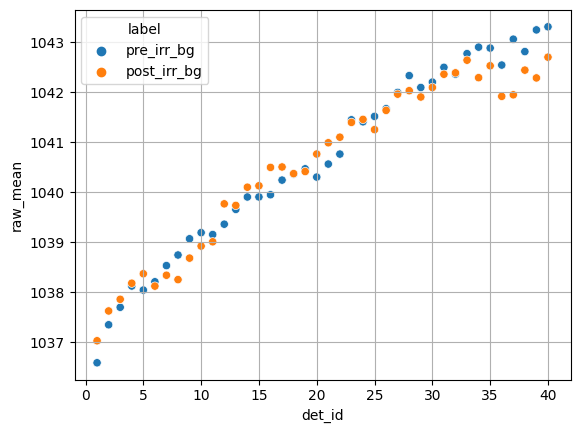

In [18]:
g = sns.scatterplot(data=df[df.label!="Co60"], x="det_id", y="raw_mean", hue="label")
g.grid()

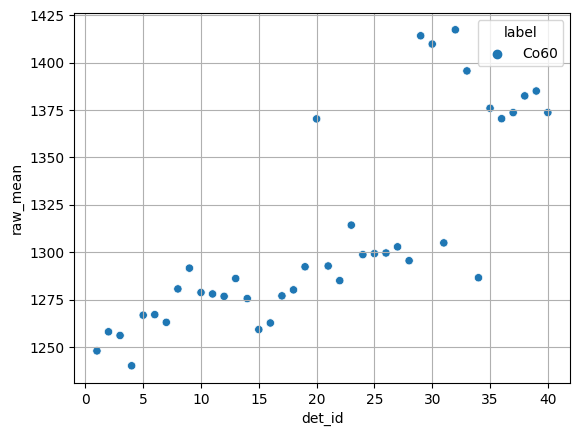

In [19]:
g = sns.scatterplot(data=df[df.label=="Co60"], x="det_id", y="raw_mean", hue="label")
g.grid()

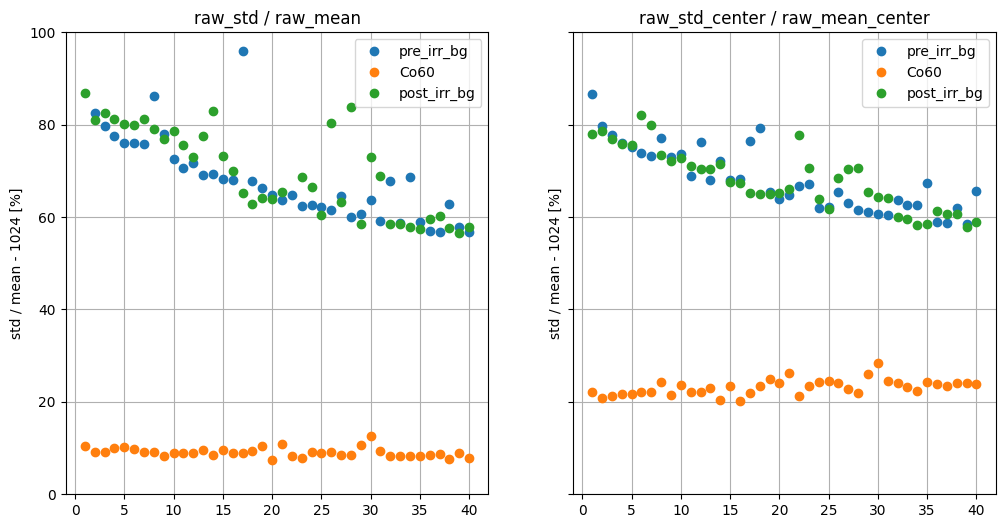

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
const_bg = 1024
for label in df.label.unique():
    df_tmp = df[df.label==label]
    axes[0].plot(df_tmp.det_id, 100 * (df_tmp.raw_std / (df_tmp.raw_mean-const_bg)) , label=label, marker="o", linestyle="None")
    axes[0].set_title("raw_std / raw_mean")
    axes[1].plot(df_tmp.det_id, 100 * (df_tmp.raw_std_center / (df_tmp.raw_mean_center-const_bg)) , label=label, marker="o", linestyle="None")
    axes[1].set_title("raw_std_center / raw_mean_center")
for ax in axes:
    ax.set_ylabel(f"std / mean - {const_bg} [%]")
    ax.set_ylim(0, 100)
    ax.legend()    
    ax.grid();

In [21]:
def plot_2d(data : np.ndarray, circle : Circle, ax : plt.Axes = None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    im = ax.imshow(np.clip(data, a_min=None, a_max=np.nanpercentile(a=data, q=95)), cmap="terrain", **kwargs)
    cbar = ax.figure.colorbar(im, ax=ax)
    ax.add_artist(plt.Circle((circle.x, circle.y), circle.r, fill=False, color="red"))
    # add a point to the center of the circle
    ax.plot(circle.x, circle.y, "ro")
    ax.plot(data.shape[1] / 2, data.shape[0] / 2, "bo")
    ax.grid()
    return ax

<AxesSubplot: >

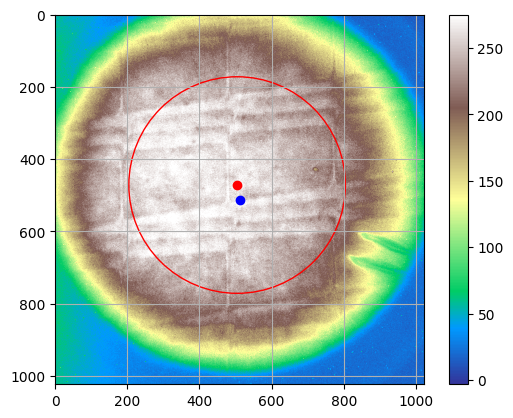

In [22]:
plot_2d(df.iloc[50].raw_data-1024, df.iloc[50].analysis_circle)

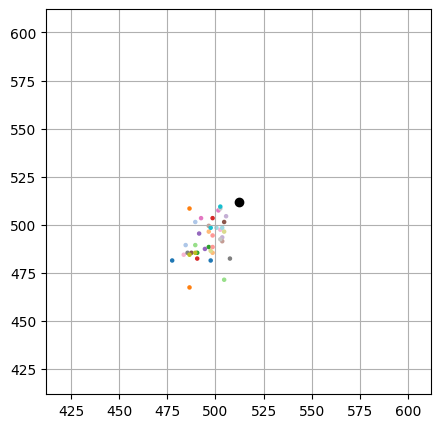

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
xs = df[df.label=="Co60"].det_circle.apply(lambda c: c.x)
ys = df[df.label=="Co60"].det_circle.apply(lambda c: c.y)
ax.scatter(xs, ys, c=df[df.label=="Co60"].det_id, cmap="tab20", s=5)
ax.grid()
ax.set_aspect("equal")
ax.set_xlim(512-100, 512+100)
ax.set_ylim(512-100, 512+100)
# place black dot at 512, 512
ax.plot(512, 512, "ko")

# FF 